## STEP 0 - ANALISI DEL PROGETTO: Disastri aerei dal 1919 al 2023

<div style="font-family: 'Verdana'; font-size:14px; color: black;">La neonata IASS (International Alliance for Safe Skies) ti ha incaricato di svolgere un'accurata analisi di tutti gli incidenti aerei che si sono verificati dal 1919 al 2023.A tale scopo ti mette a disposizione un set di dati in cui sono registrati quasi 25.000  incidenti con le seguenti informazioni: <br>
date: data dell'incidente
type: tipo del veivolo<br>
registration: codice di registrazione del veivolo<br>
operator: operatore del veivolo<br>
fatalities: numero di morti<br>
location: luogo dell'incidente<br>
country: nazione dell'incidente<br>
cat: categoria dell'incidente come descritto dal ASN<br><br>
Utilizza i dati per portare alla luce, anche tramite grafici e visualizzazioni, utili insight.<br><br>
ESEMPI DI INSIGHT<br><br>
Questi sono esempi di domande alla quale puoi trovare risposta tramite i dati, non limitarti a queste ma svolgi un’analisi approfondita ponendoti ulteriori domande che pensi possano fornire insight utili:<br> 
In quale nazione si sono verificati più incidenti?<br>
Gli incidenti avvengono più di frequente durante determinati giorni della settimana?<br>
Quali sono gli operatori più sicuri?<br>
Quale tipo di velivolo ha causato più morti?<br>
Come si sono evoluti gli incidenti dopo l'11 Settembre?<br><br>
BONUS<br><br>
Crea un cartogramma che rappresenti il numero di incidenti per nazione </div>


In [1]:
#installo i pacchetti per la visualizzazione del cartogramma bonus

!pip install geopy
!pip install geopandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# importo librerie e dataset - utilizzando il metodo describe noto che il dataset non è omogeneo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd 
from geopy.geocoders import Nominatim


disasters=pd.read_csv("aviation-accidents.csv")

disasters.describe()

,date,type,registration,operator,fatalities,location,country,cat,year
count,23967,23967,22419,23963,20029,23019,23967,23967,23967
unique,15079,3201,21962,6017,369,14608,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1916,13,2604,10713,272,4377,17424,1505


## STEP 1 : PULIZIA DEL DATASET

In [3]:
# rimpiazzo i valori nulli nella colonna type

disasters["type"].fillna("UNKNOWN", inplace=True)

# rimpiazzo i valori nulli nella colonna operator

disasters["type"].fillna("UNKNOWN", inplace=True)

# rimpiazzo i valori nulli nella colonna location

disasters["location"].fillna("UNKNOWN", inplace=True)

# rimpiazzo i valori nulli nella colonna cat

disasters["cat"].fillna("UNKNOWN", inplace=True)

# rimpiazzo il "?" e valori nulli nella colonna country

disasters['country'] = disasters['country'].replace('?', 'UNKNOWN')
disasters["country"].fillna("UNKNOWN", inplace=True)


# rimpiazzo i valori nulli della colonna fatalities

disasters["fatalities"].fillna(0, inplace=True)

#sistemo la colonna fatalities perchè al suo interno vi sono alcune celle che presentano i morti in termine di somme

def convert_value(value):
    
    value_str = str(value)
    if '+' in value_str:
        parts = value_str.split('+')  
        return sum(int(part) for part in parts)  
    else:
        return int(value_str)

disasters['fatalities'] = disasters['fatalities'].apply(convert_value)

# rimpiazzo i valori nulli della colonna registration e uniformo con le occorrenze UNREG.

disasters["registration"].fillna("UNREG.", inplace=True)

# rimpiazzo i valori nulli della colonna registration e uniformo con le occorrenze UNREG.

disasters['operator'] = disasters['operator'].replace('USAF', 'USAAF')

# elimino gli spazi iniziali e finali delle stringe per tutto il dataframe e rendo tutto maiuscolo per uniformare

for col in disasters.columns:
    if disasters[col].dtype == 'object':
        disasters[col] = disasters[col].str.strip()
        disasters[col] = disasters[col].str.upper()

# Converto la colonna 'date' nel formato data corretto

disasters['date'] = pd.to_datetime(disasters['date'], errors='coerce')

# Elimino dall'analisi gli incidenti dei quali non si ha una finestra temporale precisa

disasters_clean = disasters.dropna(subset=['date'])

# mi assicuro che la colonna Year sia congruente con la data

disasters_clean = disasters_clean.drop(columns=['year'])
disasters_clean['corrected_year'] = disasters_clean['date'].dt.year

disasters_clean.head(1000)

,date,type,registration,operator,fatalities,location,country,cat,corrected_year
61,1919-08-02,CAPRONI CA.48,UNREG.,CAPRONI,14,VERONA,ITALY,A1,1919
62,1919-08-11,FELIXSTOWE FURY,N123,RAF,1,NEAR FELIXTOWE RNAS,U.K.,A1,1919
63,1920-02-23,HANDLEY PAGE O/7,G-EANV,HANDLEY PAGE TRANSPORT,0,"ACADIA SIDING, C...",SOUTH AFRICA,A1,1920
64,1920-02-25,HANDLEY PAGE O/400,G-EAMC,HANDLEY PAGE TRANSPORT,0,NEAR EL SHEREIK,SUDAN,A1,1920
65,1920-06-30,HANDLEY PAGE O/400,G-EAKE,HANDLEY PAGE TRANSPORT,0,ÃSTANÃ¥,SWEDEN,A1,1920
...,...,...,...,...,...,...,...,...,...
1101,1942-01-30,CONSOLIDATED PBY-5 CATALINA,2413,US NAVY,0,PACIFIC,PACIFIC OCEAN,A1,1942
1102,1942-01-30,SHORT S.23 EMPIRE FLYING BOAT MK I,G-AEUH,"BOAC, OP.FOR QANTAS EMPIRE AIRWAYS",13,NEAR TIMOR,INDONESIA,C1,1942
1103,1942-01-31,DOUGLAS R3D-2 (DC-5),1904,USMC,0,NEAR AUSTRALIAN COAST,AUSTRALIA,C1,1942
1104,1942-01-31,DOUGLAS DC-2-120,DG474,RAF,0,YANGON-MINGALADO...,MYANMAR,C1,1942


# STEP 2 : INSIGHTS

<font color="red" size=16> In quale nazione si sono verificati più incidenti? </font>

<font style="color:blue;">La risposta è Stati Uniti, osservando il grafico sottostante si nota come in America il numero degli incidenti è nettamente più alto rispetto al resto del mondo</font> 


In [4]:
most_frequent_country = disasters_clean['country'].mode()

most_frequent_country

0    USA
Name: country, dtype: object

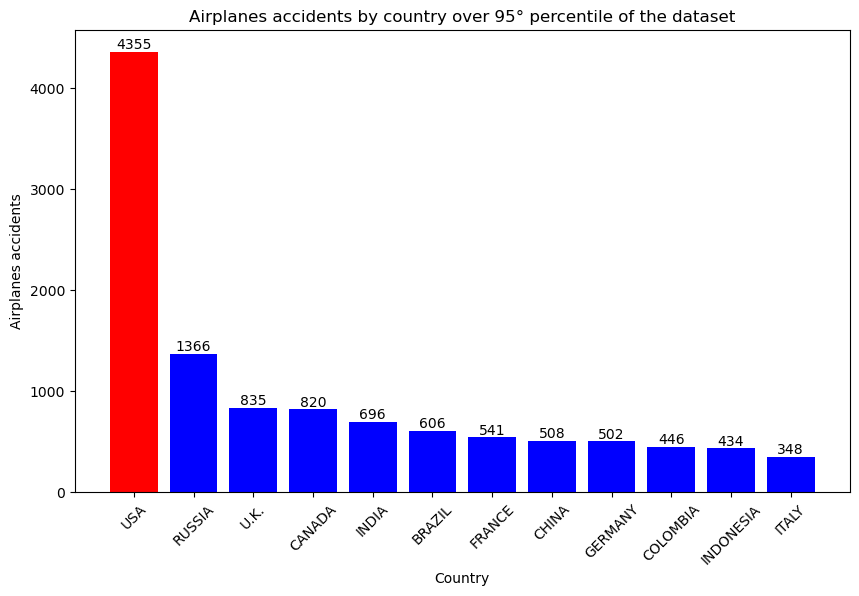

In [5]:
# Filtraggio per escludere 'UNKNOWN COUNTRY'
filtered_data = disasters_clean[disasters_clean['country'] != 'UNKNOWN COUNTRY']

# Conteggio delle occorrenze per ogni paese dopo il filtraggio
country_counts = filtered_data['country'].value_counts()

# Calcolo del 95° percentile delle occorrenze
percentile_95 = np.percentile(country_counts, 95)

# Filtraggio dei paesi con occorrenze sopra il 95° percentile
filtered_countries = country_counts[country_counts > percentile_95]

plt.style.use('tableau-colorblind10')

# Evidenzio il valore più frequente in rosso

colors = ['red' if i == 0 else 'blue' for i in range(len(filtered_countries))]

# Creazione del bar chart dopo il filtraggio

plt.figure(figsize=(10,6))
bars=plt.bar(filtered_countries.index, filtered_countries.values,color=colors)
plt.title('Airplanes accidents by country over 95° percentile of the dataset')
plt.xlabel('Country')  
plt.ylabel('Airplanes accidents')  
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')


plt.show() 

<font style="color:red;" size=16>  Gli incidenti avvengono più di frequente durante determinati giorni della settimana? </font>

<font style="color:blue;">In termini assoluti il Venerdì è il giorno nel quale capitano più frequentemente incidenti, guardando il grafico sottostante però notiamo che in realtà la differenza rispetto agli altri giorni è minima pertanto forse è più corretto affermare che il giorno più sicuro per volare è la domenica </font> 

In [6]:
# aggiungo colonna day al dataframe per deteriminare la frequenza


disasters_clean['day'] = disasters_clean['date'].dt.day_name().str.upper()

most_frequent_day = disasters_clean['day'].mode()

most_frequent_day


0    FRIDAY
Name: day, dtype: object

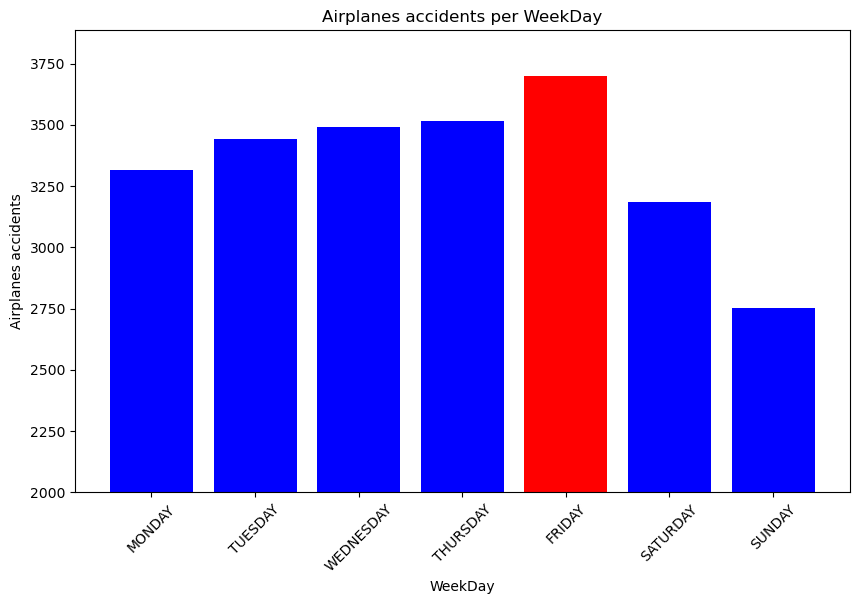

In [7]:
plt.style.use('tableau-colorblind10')

day_counts = disasters_clean['day'].value_counts()
#creo una colonna con i numeri dei giorni e ordino il grafico in base al numero del giorno
disasters_clean['day_number']= disasters_clean['date'].dt.dayofweek + 1
disasters_clean_sorted = disasters_clean.sort_values(by='day_number')
day_counts=disasters_clean_sorted.groupby('day_number').size()
days_order = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
day_counts = disasters_clean.groupby('day')['day_number'].count().reindex(index=days_order)

# Evidenzio il valore più frequente in rosso

max_frequency = day_counts.max()

colors = ['red' if count == max_frequency else 'blue' for count in day_counts]


plt.figure(figsize=(10,6))
bars=plt.bar(day_counts.index, day_counts.values,color=colors)
plt.title('Airplanes accidents per WeekDay')
plt.xlabel('WeekDay')  
plt.ylabel('Airplanes accidents')  
plt.xticks(rotation=45)
plt.ylim(bottom=2000)
plt.show() 

<font style="color:red;" size=16>  Quali sono gli operatori più sicuri </font>

<font style="color:blue;">Se analizziamo gli operatori che hanno registrato almeno un centinaio di incidenti ( circa 0.05 % del nostro dataset) possiamo notare come Soviet AF sia stato l'operatore con meno incidenti nel relativo campione </font> 

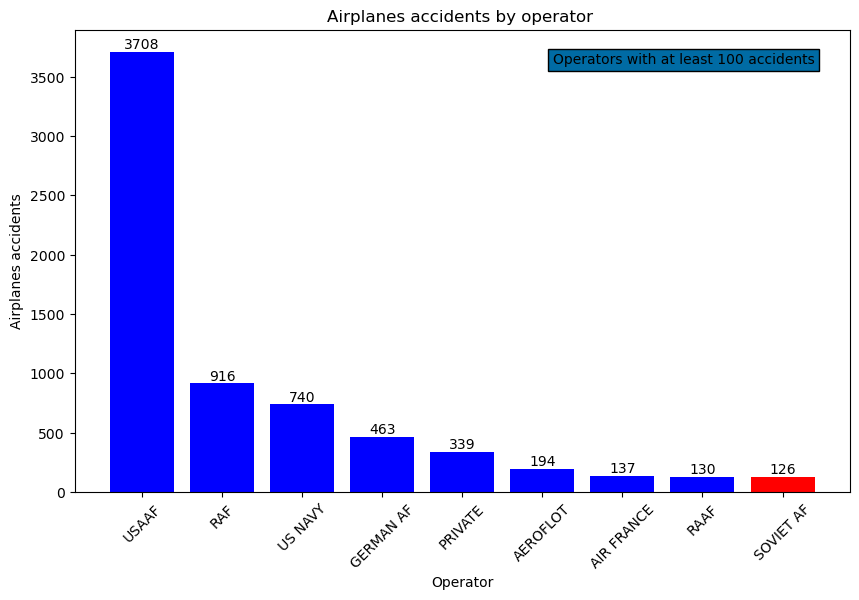

In [8]:
#escludo i valori sconosciuti di operator e mostro solo gli operatori significativi

filtered_data2 = disasters_clean[disasters_clean['operator'] != 'UNKNOWN']
operator_counts = filtered_data2['operator'].value_counts()
one_percent_threshold = len(disasters_clean) * 0.005
operators_to_keep = operator_counts[operator_counts >= one_percent_threshold].index
filtered_view = disasters_clean[disasters_clean['operator'].isin(operators_to_keep)]
filtered_operator_counts = filtered_view['operator'].value_counts()
min_frequency_operator = filtered_operator_counts.min()

# Creare il barchart
colors = ['red' if count == min_frequency_operator else 'blue' for count in filtered_operator_counts]
plt.figure(figsize=(10, 6))
bars2=plt.bar(filtered_operator_counts.index, filtered_operator_counts.values, color=colors)

plt.title('Airplanes accidents by operator ')
plt.xlabel('Operator')
plt.ylabel('Airplanes accidents')
plt.xticks(rotation=45)  
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

xlim = plt.xlim()
ylim = plt.ylim()
plt.text(xlim[1]*0.95, ylim[1]*0.95, "Operators with at least 100 accidents",
         size=10, ha='right', va='top', bbox=dict(boxstyle="square, pad=0.3"))

plt.show()


<font style="color:red;" size=16> Quale tipo di velivolo ha causato più morti?  </font>

<font style="color:blue;">Il triste primato appartiene al velivolo DOUGLAS C-47A (DC-3) con 5780 vittime </font> 


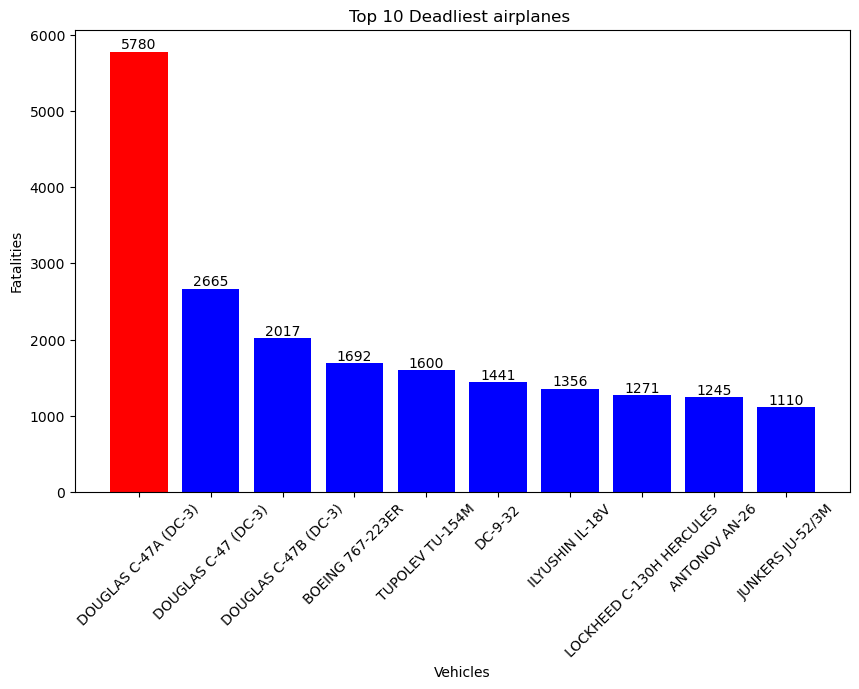

In [9]:
filtered_data3 = disasters_clean[disasters_clean['fatalities'] >=1]
fatalities_sum_by_type = filtered_data3.groupby('type')['fatalities'].sum()
top_10_fatalities_by_type = fatalities_sum_by_type.nlargest(10)

colors = ['red' if i == 0 else 'blue' for i in range(len(top_10_fatalities_by_type))]
plt.figure(figsize=(10, 6))
bars3=plt.bar(top_10_fatalities_by_type.index, top_10_fatalities_by_type.values, color=colors)

plt.title('Top 10 Deadliest airplanes ')
plt.xlabel('Vehicles')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)  
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

xlim = plt.xlim()
ylim = plt.ylim()


plt.show()




<font style="color:red;" size=16> Come si sono evoluti gli incidenti dopo l'11 Settembre?  </font>

<font style="color:blue;"> Domanda molto generica che offre molte chiavi di lettura. Se ne facciamo una questione di vittime è possibile notare nel grafico sottostante come il numero di morti negli incidenti aerei si sia ridotto rispetto ai 22 anni precedenti, se guardiamo l'ultimo biennio abbiamo un totale di circa 500 vittime contro le 4000 per solo l'anno 2021. <br> Se invece analizziamo il numero di incidenti possiamo notare come fino al 2020 il numero di eventi spiacevoli è stato più o meno costante negli ultimi 40 anni. Per fortuna il trend degli ultimi anni è in drastica diminuzione <br> <br> Possiamo quindi sommariamente concludere dicendo che volare oggigiorno non è mai stato così sicuro anche se purtroppo qualche incidente non mortale ancora si verifica quindi meglio allacciare le cinture ;)</font>


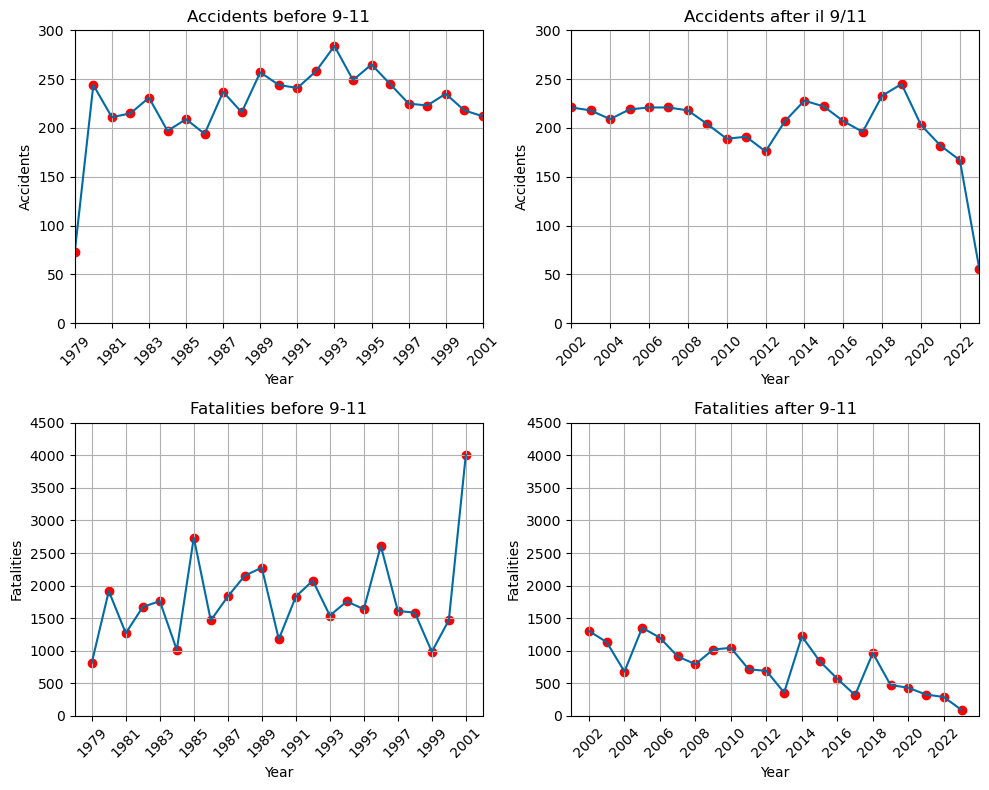

In [10]:
#Divido l'indagine nel ventennio prima e dopo 11 settembre
start_date = pd.to_datetime('1979-09-11')
#end_date = pd.to_datetime('2001-09-11')
end_date = pd.to_datetime('2001-12-31')

before_911 = disasters_clean[(disasters_clean['date'] >= start_date) & (disasters_clean['date'] <= end_date)]

before_911_year_counts = before_911['corrected_year'].value_counts().sort_index()
years_before_911 = before_911_year_counts.index
counts_before_911 = before_911_year_counts.values


#start_date = pd.to_datetime('2001-09-11')
start_date = pd.to_datetime('2001-12-31')
end_date = pd.to_datetime('2023-09-11')
after_911 = disasters_clean[(disasters_clean['date'] >= start_date) & (disasters_clean['date'] <= end_date)]

after_911_year_counts = after_911['corrected_year'].value_counts().sort_index()
years_after_911 = after_911_year_counts.index
counts_after_911 = after_911_year_counts.values



before_911_accidents_count=before_911.groupby('corrected_year').size()
after_911_accidents_count=after_911.groupby('corrected_year').size()

before_911_fatalities=before_911.groupby('corrected_year')['fatalities'].sum()
after_911_fatalities=after_911.groupby('corrected_year')['fatalities'].sum()

after_911_fatalities.head()

# Configura la figura e la griglia delle subplot: 1 riga, 2 colonne
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 'figsize' controlla la dimensione totale della figura

# Grafico per gli incidenti prima del 9/11
axs[0,0].plot(before_911_accidents_count)
axs[0,0].set_title('Accidents before 9-11')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Accidents')
axs[0,0].scatter(years_before_911, counts_before_911, color='red')
axs[0,0].grid(True)
xticks_labels = years_before_911[::2]
axs[0,0].set_ylim(0,300)
axs[0,0].set_xlim(1979,2001)
axs[0,0].set_xticks(xticks_labels)
axs[0,0].set_xticklabels(xticks_labels.astype(str), rotation=45)


# Grafico per gli incidenti dopo il 9/11
axs[0,1].plot(after_911_accidents_count)
axs[0,1].set_title('Accidents after il 9/11')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Accidents')
axs[0,1].scatter(years_after_911, counts_after_911, color='red')
axs[0,1].grid(True)
axs[0,1].set_xlim(2002,2023)
axs[0,1].set_ylim(0,300)
xticks_labels = years_after_911[::2] 
axs[0,1].set_xticks(xticks_labels)
axs[0,1].set_xticklabels(xticks_labels.astype(str), rotation=45)

# Grafico per vittime prima del 9/11

axs[1,0].plot(before_911_fatalities)
axs[1,0].set_title('Fatalities before 9-11')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Fatalities')
axs[1,0].scatter(years_before_911, before_911_fatalities, color='red')
axs[1,0].grid(True)
xticks_labels = years_before_911[::2]
axs[1,0].set_ylim(0,4500)
axs[1,0].set_xlim(1978,2002)
axs[1,0].set_xticks(xticks_labels)
axs[1,0].set_xticklabels(xticks_labels.astype(str), rotation=45)

# Grafico per vittime dopo del 9/11

axs[1,1].plot(after_911_fatalities)
axs[1,1].set_title('Fatalities after 9-11')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Fatalities')
axs[1,1].scatter(years_after_911, after_911_fatalities, color='red')
axs[1,1].grid(True)
xticks_labels = years_after_911[::2]
axs[1,1].set_ylim(0,4500)
axs[1,1].set_xlim(2001,2024)
axs[1,1].set_xticks(xticks_labels)
axs[1,1].set_xticklabels(xticks_labels.astype(str), rotation=45)


plt.tight_layout()  
plt.show()

<font style="color:red;" size=16> BONUS Crea un cartogramma che rappresenti il numero di incidenti per nazione  </font>

<font style="color:blue;"> Il seguente cartogramma mostra l'intensità degli incidenti aerei delle prime 10 nazioni al mondo di presenti in questa classifica</font>


C:\Users\stefa\AppData\Local\Temp\ipykernel_4516\1008177503.py:29: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


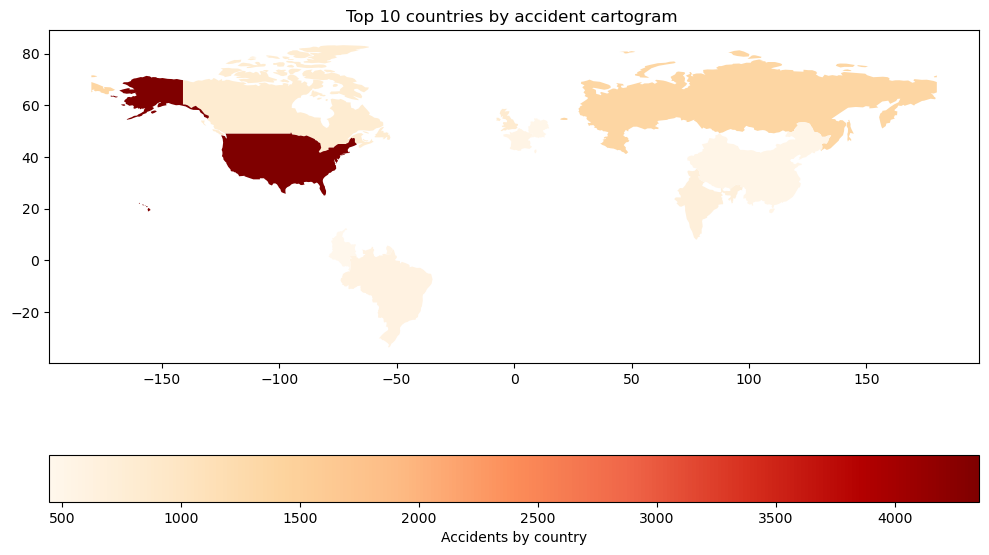

In [11]:
# proviamo a visualizzare sulla mappa mondiale la top ten dei paesi con più incidenti creo un dataframe apposito

filtered_countries=filtered_countries.nlargest(10)
maps=pd.DataFrame({'country':[],'longitude':[],'latitude':[]})
maps['country']=filtered_countries.index
maps['accidents']=filtered_countries.values

# ottengo le coordinate delle varie nazioni

def get_coordinates(location):
    geolocator = Nominatim(user_agent="my_geocoder")  # Imposta il tuo user agent
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            return None, None
    except:
        return None, None

for i, row in maps.iterrows():
    country = row['country']
    lat, lon = get_coordinates(country)
    maps.at[i, 'latitude'] = lat
    maps.at[i, 'longitude'] = lon
    
# Carica un GeoDataFrame con le geometrie dei paesi (questi dati sono incorporati in geopandas)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name']=world['name'].str.strip()
world['name']=world['name'].str.upper()

#unisco i dataframe, per farlo devo allineare alcune chiavi

world['name'] = world['name'].replace('UNITED STATES OF AMERICA', 'USA')
world['name'] = world['name'].replace('UNITED KINGDOM', 'U.K.')
merged = world.set_index('name').join(maps.set_index('country'))
merged_clean=merged.dropna(how='any')

# Creazione del cartogramma

fig, ax = plt.subplots(figsize=(12, 8))
merged_clean.plot(column='accidents', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Accidents by country",
                         'orientation': "horizontal"})
ax.set_title('Top 10 countries by accident cartogram ')
plt.show()


